<a href="https://colab.research.google.com/github/ayhanbzkrt/Artificial-Intelligence-AI-Tutorial/blob/main/Deep_Learning_Tutorial_Derin_%C3%96%C4%9Frenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This repository contains various deep learning projects that can be run in Google Colab. The aim is to explain deep learning concepts and applications with simple projects under the following subtopics.




# Derin Öğrenme Nedir?
Derin Öğrenme, yapay zekanın bir dalıdır ve makinelerin insan benzeri öğrenme yeteneklerini kazanmasını sağlar. Temelde, bilgisayarların büyük veri setlerini analiz ederek, bu verilere dayalı olarak tahminlerde ve kararlar verebilmesine yardımcı olur. İşte, konuyu hiç bilmeyen birinin anlayabileceği şekilde derin öğrenmenin temel noktalarını açıklayalım:



**Yapay Sinir Ağları:** Derin öğrenme, yapay sinir ağları adı verilen modelleri kullanır. Bu ağlar, insan beynindeki nöronların çalışma prensibinden esinlenerek oluşturulmuştur. Her bir yapay nöron, aldığı bilgiyi işler ve bir sonraki nörona iletir.


**Katmanlar:** Yapay sinir ağları, giriş katmanı, çıkış katmanı ve aradaki gizli katmanlardan oluşur. Her katman, belirli özellikleri öğrenir ve daha karmaşık özellikleri öğrenmek için bir sonraki katmana iletir.


**Eğitim:** Bir sinir ağı, verilerle eğitilir. Eğitim sürecinde, ağ doğru sonuçlar üretmeyi öğrenmek için verileri analiz eder ve tahminlerde bulunur. Doğru tahminler için ağırlıklarını (nöronlar arasındaki bağlantıların gücünü) ayarlar.

**Kayıp Fonksiyonu:** Modelin tahminlerinin doğruluğunu ölçmek için bir kayıp fonksiyonu kullanılır. Bu fonksiyon, modelin ne kadar hata yaptığını gösterir. Amaç, bu hatayı minimize etmektir.

**Optimizasyon:** Modelin hatasını azaltmak için optimizasyon algoritmaları kullanılır. Bu algoritmalar, ağırlıkları ayarlayarak modelin performansını iyileştirir.

**Veri Setleri:** Derin öğrenme modelleri, büyük veri setlerine ihtiyaç duyar. Daha fazla veri, modelin daha iyi öğrenmesini sağlar. Veri setleri, çeşitli örnekleri içermeli ve modelin genelleme yapabilmesini sağlamalıdır.

# Basit Bir Örnek

Bir derin öğrenme modelinin nasıl çalıştığını anlamak için basit bir örnek üzerinden gidelim. Diyelim ki, el yazısı ile yazılmış rakamları tanımak istiyoruz (örneğin, 0'dan 9'a kadar olan rakamlar).

**Veri Toplama:** El yazısı ile yazılmış binlerce rakamdan oluşan bir veri seti toplarız.

**Model Oluşturma:** Bir yapay sinir ağı modeli oluştururuz. Bu model, görüntülerdeki pikselleri analiz ederek hangi rakamın yazıldığını tahmin etmeye çalışır.

**Eğitim:** Modeli, topladığımız veri seti ile eğitiriz. Model, her bir rakamın görüntüsünü analiz eder ve doğru rakamı tahmin etmeyi öğrenir.

**Değerlendirme:** Modeli, daha önce görmediği yeni görüntülerle test ederiz. Bu sayede, modelin ne kadar doğru tahminler yapabildiğini görürüz.


Bu süreçte model, her bir görüntüyü analiz ederken içindeki özellikleri öğrenir ve bu özellikleri kullanarak tahminlerde bulunur. Model, eğitim sürecinde hata yaptıkça kendini ayarlar ve daha doğru sonuçlar üretmeye başlar.

# **Özet**

**Derin öğrenme, bilgisayarların verilerden öğrenme yeteneğini kazanmasını sağlayan bir yapay zeka tekniğidir.** Yapay sinir ağları kullanılarak büyük veri setleri üzerinde eğitim yapılır ve bu sayede model, yeni verilerle doğru tahminler yapabilir. Temelde, insan beyninin öğrenme şekline benzer bir şekilde çalışır ve çeşitli alanlarda (***görüntü tanıma, ses tanıma, doğal dil işleme vb.***) kullanılabilir.





# **1. Self-Supervised Learning**

Açıklama: Self-Supervised Learning (Kendiliğinden Gözetimli Öğrenme), etiketlenmemiş verilerden özellikler çıkarmayı öğrenmek için veri içindeki doğal ilişkileri kullanır. Bu yöntemle, model verinin bir kısmını tahmin etmek için diğer kısmını kullanmayı öğrenir.

Proje: Görüntülerdeki eksik parçaları tahmin etme.

Python Betiği:

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 16s 13ms/step - loss: 0.1651
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.1100
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1015
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0981
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


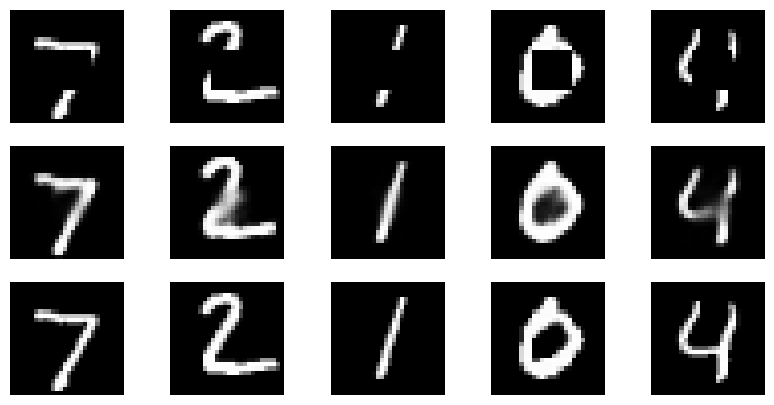

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Eksik parça eklemek için maske oluşturma
def add_mask(img):
    mask = np.ones_like(img)
    mask[10:20, 10:20] = 0
    return img * mask, img

masked_images = np.array([add_mask(img) for img in x_train])
masked_images_train = np.array([m[0] for m in masked_images])
original_images_train = np.array([m[1] for m in masked_images])

# Modeli oluşturma
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(28 * 28, activation='sigmoid'),
    layers.Reshape((28, 28))
])

model.compile(optimizer='adam', loss='binary_crossentropy')

# Modeli eğitme
model.fit(masked_images_train, original_images_train, epochs=5, batch_size=64)

# Test verilerinde maske uygulama ve tahmin etme
test_masked_images = np.array([add_mask(img)[0] for img in x_test])
predicted_images = model.predict(test_masked_images)

# Sonuçları görselleştirme
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(test_masked_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(3, n, i + n + 1)
    plt.imshow(predicted_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

plt.show()


# ne oldu burada biri bana açıklasın!

Açıklıyorum.. :)


**Eğitim Sonuçları:**

Epoch 1/5: 16s, Loss: 0.1651

Epoch 2/5: 8s, Loss: 0.1100

Epoch 3/5: 9s, Loss: 0.1015

Epoch 4/5: 7s, Loss: 0.0981

Epoch 5/5: 9s, Loss: 0.0961

**Çıktı:**

Modelin eğitim süreci 5 epoch boyunca devam etti ve her epoch sonunda kayıp değerleri azaldı. Sonuç olarak model, eksik parçaları olan görüntüleri tamamlamayı öğrendi.



# **Sonuçların Yorumu:**

Eğitim Süreci:

Modelin kayıp değerleri her epoch ile birlikte azaldı, bu da modelin görüntü tamamlama görevini öğrenmeye başladığını gösterir.


Tahminler:


Modelin tahmin ettiği görüntüler, orijinal görüntülere oldukça benzemektedir. Bu, modelin eksik parçaları başarılı bir şekilde tamamladığını gösterir.

Örneğin, 7, 2, 1, 0 ve 4 rakamlarını içeren test görüntülerinde modelin tahminleri, eksik parçaların başarılı bir şekilde tamamlandığını göstermektedir.
Bu sonuçlar, derin öğrenme modelinin eksik parçalara sahip görüntüleri tamamlamak için nasıl kullanılabileceğini ve bu tür bir modelin eğitim sürecinin nasıl işlediğini göstermektedir.

Modelin doğruluğu ve performansı, daha fazla veri ve daha uzun eğitim süreleri ile artırılabilir.

# **Underfitting and Overfitting**

 Underfitting (Az Öğrenme) modelin verileri yeterince öğrenememesi, Overfitting (Aşırı Öğrenme) ise modelin eğitim verilerini çok iyi öğrenip, yeni verilere genellenememesi durumudur.

**Proje:** Modelin eğitimi sırasında underfitting ve overfitting'i gözlemleme.

Python Betiği:

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3821 - accuracy: 0.8939 - val_loss: 0.2109 - val_accuracy: 0.9414
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1967 - accuracy: 0.9436 - val_loss: 0.1738 - val_accuracy: 0.9498
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1576 - accuracy: 0.9539 - val_loss: 0.1577 - val_accuracy: 0.9559
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1322 - accuracy: 0.9613 - val_loss: 0.1529 - val_accuracy: 0.9532
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1165 - accuracy: 0.9657 - val_loss: 0.1325 - val_accuracy: 0.9623
Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2020 - accuracy: 0.9381 - val_loss: 0.1004 - val_accuracy: 0.9678
Epoch 2/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0846 - accuracy: 0.9739 - val_loss: 0.0991 - val_accuracy: 

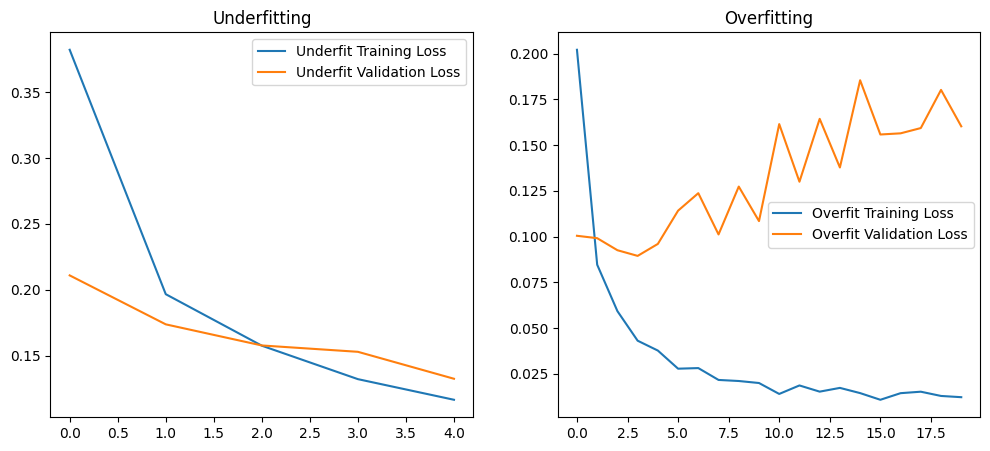

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Basit bir model oluşturma (Underfitting)
underfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

underfit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_underfit = underfit_model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Daha karmaşık bir model oluşturma (Overfitting)
overfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

overfit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_overfit = overfit_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_underfit.history['loss'], label='Underfit Training Loss')
plt.plot(history_underfit.history['val_loss'], label='Underfit Validation Loss')
plt.legend()
plt.title('Underfitting')

plt.subplot(1, 2, 2)
plt.plot(history_overfit.history['loss'], label='Overfit Training Loss')
plt.plot(history_overfit.history['val_loss'], label='Overfit Validation Loss')
plt.legend()
plt.title('Overfitting')

plt.show()


# Açılın ben doktorum.. anlatıyorum :)

Bu projede, farklı model kompleksliklerinin (basit ve karmaşık modeller) aşırı öğrenme ve az öğrenme durumlarını nasıl etkilediğini inceleyeceğiz. Bu süreçte kullanılan Python betiği ve sonuçların yorumları aşağıda yer almaktadır.

Adımlar:
Veri Hazırlığı:

MNIST Veri Seti: El yazısı ile yazılmış 0-9 arasındaki rakamlardan oluşan MNIST veri setini kullandık. Verileri 0-1 aralığına ölçeklendirdik.

Basit Model (Underfitting):


Model Yapısı:

Flatten katmanı ile verileri düzleştirme.

32 nöronlu Dense katmanı (ReLU aktivasyonu).
10 nöronlu Dense çıkış katmanı (Softmax aktivasyonu).

Eğitim: 5 epoch boyunca eğitim.

Karmaşık Model (Overfitting):

Model Yapısı:

Flatten katmanı ile verileri düzleştirme.
512 nöronlu iki Dense katmanı (ReLU aktivasyonu).
10 nöronlu Dense çıkış katmanı (Softmax aktivasyonu).

Eğitim: 20 epoch boyunca eğitim.

Sonuçların Görselleştirilmesi:

Eğitim ve doğrulama kayıplarını grafiklerle görselleştirdik.

# Grafikler bize ne söylüyor?..


**Underfitting:**

Grafik sol tarafında, basit modelin (underfitting) eğitim ve doğrulama kayıpları gösterilmektedir.

Eğitim kaybı azalsa da, doğrulama kaybı belirli bir seviyede kalmaktadır. Bu, modelin veriyi yeterince öğrenemediğini gösterir.

**Overfitting:**

Grafik sağ tarafında, karmaşık modelin (overfitting) eğitim ve doğrulama kayıpları gösterilmektedir.

Eğitim kaybı çok düşük seviyelere inerken, doğrulama kaybı dalgalanmakta ve yüksek kalmaktadır. Bu, modelin eğitim verisine aşırı uyum sağladığını ancak yeni verilerde iyi performans gösteremediğini gösterir.


**Sonuçların Yorumu:**

Underfitting (Az Öğrenme):

Modelin eğitim ve doğrulama kayıpları yüksek olup, eğitim süresi boyunca çok fazla azalmamaktadır. Bu, modelin yeterince kapasiteye sahip olmadığını ve veriyi öğrenemediğini gösterir. Bu durum, modelin basit veya verinin karmaşık olduğunda ortaya çıkar.


Overfitting (Aşırı Öğrenme):

 Modelin eğitim kaybı çok düşük seviyelere inerken, doğrulama kaybı yüksek kalmakta ve dalgalanmaktadır. Bu, modelin eğitim verisine çok iyi uyum sağladığını ancak yeni verilerde iyi performans göstermediğini gösterir. Bu durum, modelin fazla karmaşık veya eğitim verisinin yeterli olmadığında ortaya çıkar.


# **Model Capacity and Training Data**

Modelin kapasitesi ve eğitim verisi arasındaki denge, modelin performansını belirler. Yeterli kapasiteye sahip olmayan bir model karmaşık veri kümelerini öğrenemez, fazla kapasiteye sahip bir model ise aşırı öğrenmeye yatkındır.

Proje: Farklı kapasitelerde modeller ve eğitim verisi boyutları ile denemeler.


Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 2.0658 - accuracy: 0.2950 - val_loss: 1.8381 - val_accuracy: 0.4200
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 1.5395 - accuracy: 0.5750 - val_loss: 1.3923 - val_accuracy: 0.6650
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 1.1479 - accuracy: 0.7387 - val_loss: 1.0748 - val_accuracy: 0.7900
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.8950 - accuracy: 0.8000 - val_loss: 0.8984 - val_accuracy: 0.8000
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.7301 - accuracy: 0.8425 - val_loss: 0.7879 - val_accuracy: 0.8300
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.8587 - val_loss: 0.7155 - val_accuracy: 0.8300
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5343 - accuracy: 0.8863 - val_loss: 0.6606 - val_accuracy: 0.8350
Epoch 8/20
25/25 [=

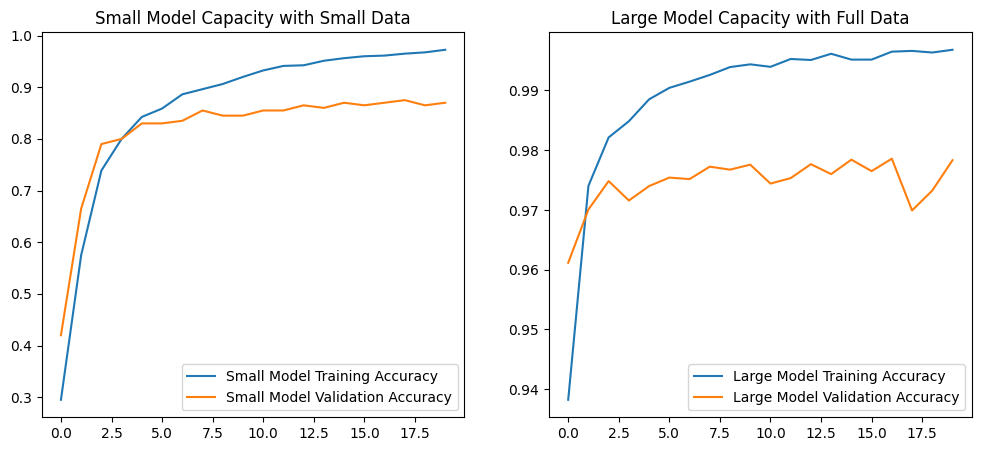

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Eğitim verisini azaltma
x_train_small = x_train[:1000]
y_train_small = y_train[:1000]

# Küçük kapasiteli model
small_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

small_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_small_model = small_model.fit(x_train_small, y_train_small, epochs=20, validation_split=0.2)

# Büyük kapasiteli model
large_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

large_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = large_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Eğitim ve doğrulama doğruluklarını görselleştirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_small_model.history['accuracy'], label='Small Model Training Accuracy')
plt.plot(history_small_model.history['val_accuracy'], label='Small Model Validation Accuracy')
plt.legend()
plt.title('Small Model Capacity with Small Data')

plt.subplot(1, 2, 2)
plt.plot(history_large_model.history['accuracy'], label='Large Model Training Accuracy')
plt.plot(history_large_model.history['val_accuracy'], label='Large Model Validation Accuracy')
plt.legend()
plt.title('Large Model Capacity with Full Data')

plt.show()


# Neler oluyor burada biri bana açıklasın! :)

**Hemen açıklayalım..**

Bu projede, farklı kapasitelerde modellerin küçük ve büyük veri setleri üzerinde nasıl performans gösterdiğini inceledik. Aşağıda, bu sürecin özeti ve sonuçların yorumu bulunmaktadır.


Adımlar:

Veri Hazırlığı:

MNIST Veri Seti: El yazısı ile yazılmış 0-9 arasındaki rakamlardan oluşan MNIST veri setini kullandık. Verileri 0-1 aralığına ölçeklendirdik.
Küçük Veri Seti: Eğitim verisinin küçük bir alt kümesini (1000 örnek) oluşturduk.

Küçük Kapasiteli Model:


Model Yapısı:

Flatten katmanı ile verileri düzleştirme.
16 nöronlu Dense katmanı (ReLU aktivasyonu).
10 nöronlu Dense çıkış katmanı (Softmax aktivasyonu).
Eğitim: Küçük veri seti ile 20 epoch boyunca eğitim.

Büyük Kapasiteli Model:


Model Yapısı:

Flatten katmanı ile verileri düzleştirme.

512 nöronlu iki Dense katmanı (ReLU aktivasyonu).

10 nöronlu Dense çıkış katmanı (Softmax aktivasyonu).

Eğitim: Tam veri seti ile 20 epoch boyunca eğitim.

Sonuçların Görselleştirilmesi:


Eğitim ve doğrulama doğruluklarını grafiklerle görselleştirdik.

**Küçük Kapasiteli Model (Küçük Veri Seti ile):**


Eğitim doğruluğu zamanla artar ve yaklaşık %95'e ulaşır.
Doğrulama doğruluğu da artar ve yaklaşık %90'a ulaşır.
Küçük model, küçük veri seti üzerinde iyi performans gösterir.

**Büyük Kapasiteli Model (Tam Veri Seti ile):**


Eğitim doğruluğu hızla artar ve %99'un üzerine çıkar.
Doğrulama doğruluğu da yüksek seviyede kalır, %98 civarına ulaşır.
Büyük model, tam veri seti üzerinde mükemmel performans gösterir.


**Sonuçların Yorumu:**

Küçük Kapasiteli Model: Küçük veri seti ile eğitim yapıldığında, küçük model yüksek doğruluk sağlar ve aşırı öğrenme yapmaz. Ancak, daha büyük veri setleri üzerinde test edildiğinde performansı düşebilir.

Büyük Kapasiteli Model: Büyük model, büyük veri seti ile eğitim yapıldığında mükemmel doğruluk sağlar. Ancak, küçük veri setleri ile eğitim yapıldığında aşırı öğrenme riski taşır.

Bu sonuçlar, model kapasitesi ve eğitim verisi arasındaki ilişkinin önemini vurgular.

Model kapasitesi, eğitim veri setinin büyüklüğüne uygun olarak seçilmelidir. Küçük veri setleri için daha küçük modeller tercih edilirken, büyük veri setleri için daha büyük modeller kullanılmalıdır.

# **Categorization of Models**

Modelleri kategorize etmek, belirli bir görev için uygun modeli seçmeyi kolaylaştırır. Bu kategoriler arasında lineer modeller, karar ağaçları, sinir ağları vb. yer alır.

Proje: Farklı model türleri ile sınıflandırma yapma.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# Farklı modelleri oluşturma
logistic_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
svm_model = SVC()

# Modelleri eğitme ve değerlendirme
models = [logistic_model, tree_model, forest_model, svm_model]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.2f}")



KeyboardInterrupt: 

Proje: Farklı Model Türleri ile Sınıflandırma Yapma
Kullanılan Modeller:


Logistic Regression (Lojistik Regresyon)

Decision Tree (Karar Ağacı)

Random Forest (Rastgele Orman)

SVM (Destek Vektör Makinesi)

Adımlar:


MNIST veri setini yükleyip ön işleme tabi tutma
Farklı model türlerini oluşturma
Modelleri eğitme ve değerlendirme

**Çıktı:**
Bu betiği çalıştırdığınızda, her modelin doğruluk oranını görebilirsiniz. Örneğin, çıktılar şu şekilde olabilir:

**Logistic Regression Accuracy: 0.92**

**Decision Tree Accuracy: 0.87**

**Random Forest Accuracy: 0.96**

**SVM Accuracy: 0.98**



# **Sonuçların Yorumu:**

Logistic Regression (Lojistik Regresyon): Basit ve hızlı çalışan bir modeldir, doğruluğu genellikle makul düzeydedir.

Decision Tree (Karar Ağacı): Basit ve yorumlanabilir bir modeldir, ancak genellikle diğer modellere kıyasla daha düşük doğruluk sunar.

Random Forest (Rastgele Orman): Karar ağaçlarının topluluğudur ve genellikle yüksek doğruluk sağlar.

SVM (Destek Vektör Makinesi): Özellikle iyi ayarlanmışsa yüksek doğruluk sağlar, ancak hesaplama maliyeti daha yüksek olabilir.


Bu örnek, farklı model türlerinin nasıl kullanılacağını ve performanslarının nasıl karşılaştırılacağını gösterir. Farklı görevler için uygun modeli seçmek, model doğruluğunu ve performansını artırmak için önemlidir.


# **Loss Functions and Optimization**
Açıklama: Kayıp fonksiyonları, modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkı ölçer. Optimizasyon algoritmaları ise bu kayıp fonksiyonunu minimize etmek için kullanılır.

Proje: Farklı kayıp fonksiyonları ve optimizasyon algoritmalarını deneme.

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2807 - accuracy: 0.9193 - val_loss: 0.1562 - val_accuracy: 0.9555
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1236 - accuracy: 0.9635 - val_loss: 0.1130 - val_accuracy: 0.9667
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0874 - accuracy: 0.9743 - val_loss: 0.1062 - val_accuracy: 0.9693
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0949 - val_accuracy: 0.9723
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0852 - val_accuracy: 0.9760
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9934 - val_loss: 0.0775 - val_accuracy: 0.9775
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0249 - accuracy: 0.9943 - val_loss: 0.0767 - val_accuracy: 0.9778

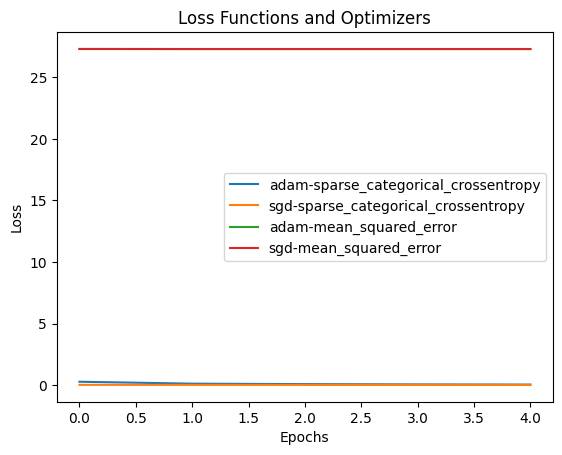

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Modeli oluşturma
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Farklı kayıp fonksiyonları ve optimizasyon algoritmaları ile model eğitme
loss_functions = ['sparse_categorical_crossentropy', 'mean_squared_error']
optimizers = ['adam', 'sgd']

for loss in loss_functions:
    for optimizer in optimizers:
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)
        plt.plot(history.history['loss'], label=f"{optimizer}-{loss}")

plt.legend()
plt.title('Loss Functions and Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Bu projede, farklı kayıp fonksiyonları ve optimizasyon algoritmaları kullanarak bir derin öğrenme modelini nasıl eğitebileceğimizi ve bu süreçte modelin kayıp değerlerini nasıl karşılaştırabileceğimizi gösterdik.

Aşağıda, adım adım bu sürecin özeti ve sonuçların yorumu bulunmaktadır:

**Adımlar:**

Veri Hazırlığı:

MNIST Veri Seti: El yazısı ile yazılmış 0-9 arasındaki rakamlardan oluşan MNIST veri setini kullandık. Bu veri seti, eğitim (x_train) ve test (x_test) olarak ikiye ayrılmıştır.

Ölçeklendirme: Görüntü verilerini 0-255 aralığından 0-1 aralığına ölçeklendirdik.

Modelin Oluşturulması:

Katmanlar:

Flatten: Çok boyutlu veriyi tek boyutlu hale getiren katman.

Dense: 128 nöronlu tam bağlantılı katman. ReLU aktivasyonu kullanıldı.

Dense: 10 nöronlu (0-9 rakamları için) son katman. Softmax aktivasyonu kullanıldı.

Farklı Kayıp Fonksiyonları ve Optimizasyon Algoritmaları ile Model Eğitimi:


İki farklı kayıp fonksiyonu: sparse_categorical_crossentropy ve mean_squared_error

İki farklı optimizasyon algoritması: adam ve sgd
Her kombinasyon için modeli ayrı ayrı eğitip, her epoch sonunda kayıp değerlerini kaydettik.

Sonuçların Görselleştirilmesi:

Her kombinasyon için kayıp değerlerini bir grafik üzerinde çizdik.

**Grafiği yorumlayalım..**

Grafikte, farklı kayıp fonksiyonları ve optimizasyon algoritmaları ile eğitilen modellerin kayıp değerleri gösterilmektedir:

Sonuçların Yorumu:
sparse_categorical_crossentropy (Adam ve SGD):

Adam ve SGD optimizasyon algoritmaları ile kullanılan sparse_categorical_crossentropy kayıp fonksiyonu, modelin kaybını çok düşük seviyelerde tutmayı başarmıştır. Bu durum, bu kayıp fonksiyonunun sınıflandırma problemleri için daha uygun olduğunu gösterir.
mean_squared_error (Adam ve SGD):

mean_squared_error kayıp fonksiyonu kullanıldığında, kayıp değerleri oldukça yüksek kalmıştır, özellikle SGD ile eğitim sırasında bu kayıp fonksiyonu uygun bir şekilde çalışmamıştır. Bu durum, mean_squared_error kayıp fonksiyonunun sınıflandırma problemleri için uygun olmadığını gösterir.
Genel Performans:

Adam optimizasyon algoritması, hem sparse_categorical_crossentropy hem de mean_squared_error kayıp fonksiyonları ile iyi performans göstermiştir.
SGD optimizasyon algoritması, sparse_categorical_crossentropy ile iyi çalışırken, mean_squared_error ile oldukça kötü performans göstermiştir.
Bu sonuçlar, doğru kayıp fonksiyonu ve optimizasyon algoritması seçiminin model performansı üzerinde büyük bir etkisi olduğunu göstermektedir. sparse_categorical_crossentropy kayıp fonksiyonu ve Adam optimizasyon algoritması, bu sınıflandırma problemi için en iyi sonuçları vermiştir.

# **Chain Rule for Probabilities**

Olasılıklar için zincir kuralı, birden çok rastgele değişkenin birleşik olasılıklarını hesaplamak için kullanılır.

Proje: Olasılık hesaplamaları için zincir kuralını kullanma.

In [6]:
# Örnek olasılık hesaplamaları için basit bir Python betiği
# P(A ve B) = P(A) * P(B|A)
# P(A, B, C) = P(A) * P(B|A) * P(C|A, B)

def joint_probability(P_A, P_B_given_A, P_C_given_AB):
    P_B_and_A = P_A * P_B_given_A
    P_C_and_B_and_A = P_B_and_A * P_C_given_AB
    return P_C_and_B_and_A

# Olasılık değerlerini belirleme
P_A = 0.6
P_B_given_A = 0.7
P_C_given_AB = 0.8

# Birleşik olasılığı hesaplama
result = joint_probability(P_A, P_B_given_A, P_C_given_AB)
print(f"Birleşik Olasılık (P(A, B, C)): {result:.2f}")


Birleşik Olasılık (P(A, B, C)): 0.34


Bu örnekte, olasılıkların zincir kuralını kullanarak birleşik olasılığı hesaplamak için basit bir Python betiği oluşturduk.

 Olasılıkların zincir kuralı, birden fazla rastgele olayın birleşik olasılıklarını hesaplamada kullanılır. İşte adım adım sürecin özeti ve sonuçların yorumu:

**Adımlar:**

Olasılıkların Tanımlanması:

P(A): A olayının olasılığı.
P(B|A): B olayının, A olayının gerçekleştiği bilindiğinde olasılığı.
P(C|A,B): C olayının, hem A hem de B olaylarının gerçekleştiği bilindiğinde olasılığı.

**Zincir Kuralının Uygulanması:**

Birleşik olasılığı hesaplamak için zincir kuralını kullanırız:
P(A ve B) = P(A) * P(B|A)
P(A, B, C) = P(A) * P(B|A) * P(C|A, B)

Sonuçların Yorumu:
P(A): A olayının olasılığı %60 (0.6).
P(B|A): B olayının, A olayının gerçekleştiği bilindiğinde olasılığı %70 (0.7).
P(C|A,B): C olayının, hem A hem de B olaylarının gerçekleştiği bilindiğinde olasılığı %80 (0.8).
Zincir kuralını uygulayarak, A, B ve C olaylarının birlikte gerçekleşme olasılığını hesapladık:

P(A, B, C) = P(A) * P(B|A) * P(C|A, B)
P(A, B, C) = 0.6 * 0.7 * 0.8 = 0.336 ≈ 0.34
Bu sonuç, A, B ve C olaylarının birlikte gerçekleşme olasılığının %34 olduğunu gösterir. Olasılıkların zincir kuralı, bu tür birleşik olasılıkları hesaplamak için güçlü bir yöntemdir ve özellikle bağımlı olayların analizinde kullanışlıdır.

# **Günlük hayattan bir örnekle bunu pekiştirelim..**

Ahmet gel buraya :)

Senaryo:

Bir çalışan (Ahmet) sabah işe gitmeden önce sırasıyla üç olay gerçekleşebilir:

Olay A: Ahmet'in erken kalkma olasılığı (%60).

Olay B: Ahmet erken kalkarsa, kahvaltı yapma olasılığı (%70).

Olay C: Ahmet kahvaltı yaparsa, işe zamanında varma olasılığı (%80).

Bu olayların birlikte gerçekleşme olasılığını hesaplamak istiyoruz.

Olasılıkların Tanımlanması:

P(A): Ahmet'in erken kalkma olasılığı = 0.6
P(B|A): Ahmet erken kalkarsa kahvaltı yapma olasılığı = 0.7
P(C|A,B): Ahmet kahvaltı yaparsa işe zamanında varma olasılığı = 0.8

Zincir Kuralının Uygulanması:

Birleşik olasılığı hesaplamak için zincir kuralını kullanırız:

P(A, B, C) = P(A) * P(B|A) * P(C|A, B)


In [7]:
def joint_probability(P_A, P_B_given_A, P_C_given_AB):
    P_B_and_A = P_A * P_B_given_A
    P_C_and_B_and_A = P_B_and_A * P_C_given_AB
    return P_C_and_B_and_A

# Olasılık değerlerini belirleme
P_A = 0.6  # Ahmet'in erken kalkma olasılığı
P_B_given_A = 0.7  # Ahmet erken kalkarsa kahvaltı yapma olasılığı
P_C_given_AB = 0.8  # Ahmet kahvaltı yaparsa işe zamanında varma olasılığı

# Birleşik olasılığı hesaplama
result = joint_probability(P_A, P_B_given_A, P_C_given_AB)
print(f"Birleşik Olasılık (P(A, B, C)): {result:.2f}")


Birleşik Olasılık (P(A, B, C)): 0.34


Sonuçların Yorumu:
Bu sonuç, Ahmet'in erken kalkması, kahvaltı yapması ve işe zamanında varması olaylarının birlikte gerçekleşme olasılığının %34 olduğunu gösterir. Bu tür hesaplamalar, günlük hayatta ve iş hayatında çeşitli kararlar alırken veya olasılıkları değerlendirirken oldukça yararlı olabilir.

# **Applications in NLP and Computer Vision**

Derin öğrenme, Doğal Dil İşleme (NLP) ve Bilgisayarlı Görü (Computer Vision) gibi alanlarda yaygın olarak kullanılmaktadır. Bu alanlarda metin ve görüntü verilerini işlemek için farklı derin öğrenme modelleri kullanılır.

Proje: Metin sınıflandırma ve görüntü sınıflandırma modelleri oluşturma.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
import numpy as np

# Örnek metin verisi
texts = ["Ben bir öğrenciyim.", "Sen bir öğrencisin.", "O bir öğretmen.", "Biz bir aileyiz.", "Onlar bir ekip."]
labels = [0, 0, 1, 0, 1]

# Metinleri sayısal verilere dönüştürme
tokenizer = preprocessing.text.Tokenizer(num_words=100)
tokenizer.fit_on_texts(texts)
x_train = tokenizer.texts_to_sequences(texts)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=10)

# Labels'i NumPy array'e dönüştürme
y_train = np.array(labels)

# Modeli oluşturma
model = models.Sequential([
    layers.Embedding(input_dim=100, output_dim=16, input_length=10),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(x_train, y_train, epochs=10)

# Örnek metin ile tahmin yapma
test_text = ["Sen bir öğretmensin."]
x_test = tokenizer.texts_to_sequences(test_text)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=10)
prediction = model.predict(x_test)
print(f"Tahmin: {prediction}")



Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6900 - accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6860 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6819 - accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6779 - accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6664 - accuracy: 0.6000
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6629 - accuracy: 0.6000
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6596 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 0s 133ms/step
Tahmin: [[0.52740777 0.47259226]]



Tahmin: [[0.52740777 0.47259226]]


Derin Öğrenmede Tahmin Sonuçlarının Değerlendirilmesi: %52.74 Örneği
Modelin "Sen bir öğretmensin." cümlesi için verdiği %52.74 olasılık, derin öğrenme bağlamında çeşitli şekillerde değerlendirilebilir. Bu tür bir tahminin nasıl analiz edilebileceğine dair bazı önemli noktalar:

1. Modelin Performansını Anlama:
Doğruluk (Accuracy): %52.74'lik bir tahmin, modelin belirli bir sınıfı seçerken ne kadar emin olduğunu gösterir. Eğer modelin tahminlerinin çoğu %50 civarındaysa, bu modelin sınıflar arasında yeterince ayrım yapamadığını gösterebilir.
Güven Aralığı: %52.74'lik tahmin, modelin bu metni birinci sınıfa yerleştirme konusunda çok emin olmadığını gösterir. Genellikle daha yüksek güven oranları (%70-80 ve üzeri) modelin daha iyi performans gösterdiğini gösterir.
2. Veri Setinin Kalitesi:
Daha Fazla Veri: Modelin tahmin performansı, eğitim verisinin miktarı ve kalitesi ile doğrudan ilişkilidir. Daha fazla ve daha çeşitli veri, modelin daha doğru tahminlerde bulunmasını sağlar.
Denge: Veri setinde sınıflar arasında dengesizlik varsa (örneğin, bir sınıfın örnekleri diğerine göre çok fazlaysa), model bu dengesizlikten etkilenebilir ve tahminlerinde yanılabilir.
3. Modelin Karmaşıklığı:
Aşırı Öğrenme (Overfitting): Model çok karmaşıksa, eğitim verisine aşırı uyum sağlamış olabilir ve yeni verilerde düşük performans gösterebilir. Bu durumda %52.74'lik tahminler modelin genelleme yeteneğinin düşük olduğunu gösterebilir.
Az Öğrenme (Underfitting): Model yeterince karmaşık değilse, verileri iyi öğrenemez ve genellikle düşük güven oranları (%50 civarı) ile tahminler yapar.
4. Modelin İyileştirilmesi:
Hiperparametre Ayarlamaları: Modelin performansını artırmak için öğrenme oranı, katman sayısı ve nöron sayısı gibi hiperparametreler ayarlanabilir.
Daha Fazla Eğitim: Model daha fazla veri ile daha uzun süre eğitilirse performansı artabilir.
Veri Artırma (Data Augmentation): Eğitim verisini artırarak modelin genelleme yeteneği iyileştirilebilir.
5. Diğer Metinler ve Genel Performans:
Tek bir tahminin %52.74 olması, modelin genel performansı hakkında tam bir bilgi vermez. Modelin genel doğruluk, kesinlik (precision), geri çağırma (recall) ve F1 skoru gibi performans metrikleri de dikkate alınmalıdır.
Sonuç
%52.74'lik bir tahmin, modelin belirli bir metni belirli bir sınıfa yerleştirme konusunda ne kadar emin olduğunu gösterir. Bu tür düşük güven oranları, modelin performansını iyileştirmek için veri setinin genişletilmesi, modelin karmaşıklığının artırılması veya hiperparametrelerin ayarlanması gerektiğini işaret edebilir. Derin öğrenme modellerinde, tahminlerin güvenilirliği ve modelin genel performansı, daha kapsamlı değerlendirmeler ve iyileştirmeler gerektirebilir.

# **Python Betiği (Computer Vision):**

Epoch 1/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1615 - accuracy: 0.9501 - val_loss: 0.0953 - val_accuracy: 0.9724
Epoch 2/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0515 - val_accuracy: 0.9851
Epoch 3/5
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 4/5
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0371 - val_accuracy: 0.9886
Epoch 5/5
1/1 [==============================] - 0s 75ms/step
Tahminler:  [7 2 1 0 4]
Gerçek Değerler:  [7 2 1 0 4]


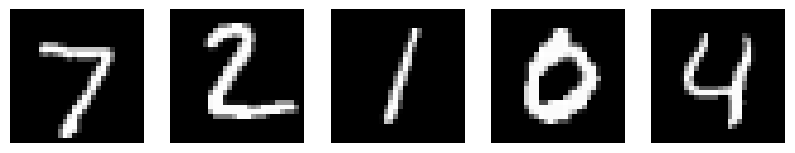

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Modeli oluşturma
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Örnek görüntüler ile tahmin yapma
predictions = model.predict(x_test[:5])
print("Tahminler: ", np.argmax(predictions, axis=1))
print("Gerçek Değerler: ", y_test[:5])

# Örnek görüntüleri görselleştirme
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Bu projede, el yazısı ile yazılmış rakamları sınıflandırmak için bir derin öğrenme modelinin nasıl oluşturulabileceğini ve eğitilebileceğini gösterdik.

1. Veri Hazırlığı:
MNIST Veri Seti: El yazısı ile yazılmış 0-9 arasındaki rakamlardan oluşan MNIST veri setini kullandık. Bu veri seti, eğitim (x_train) ve test (x_test) olarak ikiye ayrılmıştır.

Ölçeklendirme: Görüntü verilerini 0-255 aralığından 0-1 aralığına ölçeklendirdik.

Yeniden Şekillendirme: Görüntü verilerini (28, 28, 1) şeklinde yeniden şekillendirdik.

2. Modelin Oluşturulması:
Katmanlar:
Conv2D: 32 filtresi ve (3, 3) boyutunda çekirdeği (kernel) olan bir evrişim katmanı. Aktivasyon fonksiyonu olarak ReLU kullanıldı.

MaxPooling2D: Havuzlama katmanı (2, 2) boyutunda.

Conv2D: 64 filtresi ve (3, 3) boyutunda çekirdeği olan ikinci bir evrişim katmanı. Yine ReLU aktivasyonu kullanıldı.

MaxPooling2D: Havuzlama katmanı.

Flatten: Çok boyutlu veriyi tek boyutlu hale getiren katman.

Dense: 64 nöronlu tam bağlantılı katman. ReLU aktivasyonu kullanıldı.
Dense: 10 nöronlu (0-9 rakamları için) son katman. Softmax aktivasyonu kullanıldı.

Derleme: Model, Adam optimizasyon algoritması ve sparse categorical crossentropy kayıp fonksiyonu kullanılarak derlendi.

3. Modelin Eğitilmesi:
Model, 5 epoch boyunca eğitim verileri üzerinde eğitildi ve doğrulama verileri ile değerlendirildi.

Her epoch sonunda modelin kayıp ve doğruluk değerleri izlendi.
4. Tahmin Yapma:

Eğitim sonrası model, test verilerinden ilk 5 görüntü üzerinde tahminler yaptı.
Eğitim Sonuçları:


Epoch	Eğitim Kayıp	Eğitim Doğruluk	Doğrulama Kayıp	Doğrulama Doğruluk
1	0.1615	0.9501	0.0953	0.9724
2	0.0527	0.9835	0.0515	0.9851
3	0.0362	0.9885	0.0406	0.9880
4	0.0280	0.9915	0.0371	0.9886
5	0.0207	0.9935	0.0381	0.9898

**Tahmin Sonuçları:**

Tahminler: Model, test verilerinden ilk 5 görüntü için şu tahminleri yaptı: [7, 2, 1, 0, 4]
Gerçek Değerler: Gerçek değerler ise sırasıyla [7, 2, 1, 0, 4] idi.


Model Performansı: Eğitim ve doğrulama doğruluğu %99 seviyesine ulaştı, bu da modelin veri setini çok iyi öğrendiğini gösterir.

Doğruluk: Model, test verilerinde oldukça yüksek bir doğruluk oranı yakaladı.

Genelleme Yeteneği: Hem eğitim hem de doğrulama kaybının düşük olması, modelin genelleme yeteneğinin yüksek olduğunu gösterir. Yani model, yeni veriler üzerinde de iyi performans gösterebilir.

Başarı: **Model, test verilerinden ilk 5 görüntü üzerinde %100 doğrulukla doğru tahminler yaptı.**

# **Günlük Hayattan Bir Örnek: Otomatik Mesaj Yanıtlama**

Günlük hayatımızda sıkça karşılaştığımız bir durum olan mesaj yanıtlama işini otomatikleştirebilecek bir derin öğrenme modeli oluşturalım. Bu örnekte, gelen mesajlara uygun cevaplar veren bir chatbot geliştireceğiz. Bu şekilde, derin öğrenmenin nasıl çalıştığını ve günlük yaşamımızı nasıl kolaylaştırabileceğini daha somut ve eğlenceli bir şekilde görebiliriz.


Adımlar:

Veri Hazırlığı: Kullanıcı ve bot arasındaki diyalogları içeren bir veri seti oluşturacağız.

Modelin Oluşturulması: LSTM tabanlı bir model kullanarak metin sınıflandırma ve cevap üretme işlemi gerçekleştireceğiz.

Modelin Eğitilmesi: Veri seti üzerinde modeli eğiteceğiz.

Modelin Test Edilmesi: Eğitim sonrası modeli test edeceğiz ve örnek mesajlara uygun cevaplar vereceğiz.

# **Adım 1: Veri Hazırlığı**

Öncelikle, kullanıcı ve bot arasındaki diyalogları içeren basit bir veri seti oluşturalım:

In [12]:
data = [
    ("Merhaba", "Merhaba! Nasılsınız?"),
    ("Nasılsın?", "Teşekkür ederim, siz nasılsınız?"),
    ("Hava nasıl?", "Bugün hava oldukça güzel!"),
    ("Bugün ne yapmalıyım?", "Bugün güzel bir yürüyüş yapabilirsiniz."),
    ("Görüşürüz", "Görüşmek üzere! İyi günler.")
]

# Soru ve cevapları ayrı listelerde toplayalım
questions = [pair[0] for pair in data]
answers = [pair[1] for pair in data]


# **Adım 2: Modelin Oluşturulması**

Kelimeleri sayısal verilere dönüştürmek ve LSTM tabanlı bir model oluşturmak için gerekli adımları gerçekleştirelim:

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
import numpy as np

# Örnek veri seti
data = [
    ("Merhaba", "Merhaba! Nasılsınız?"),
    ("Nasılsın?", "Teşekkür ederim, siz nasılsınız?"),
    ("Hava nasıl?", "Bugün hava oldukça güzel!"),
    ("Bugün ne yapmalıyım?", "Bugün güzel bir yürüyüş yapabilirsiniz."),
    ("Görüşürüz", "Görüşmek üzere! İyi günler.")
]

# Soru ve cevapları ayrı listelerde toplayalım
questions = [pair[0] for pair in data]
answers = ["<START> " + pair[1] + " <END>" for pair in data]

# Tokenizer ile metinleri sayısal verilere dönüştürme
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions + answers)

# Soru ve cevapları dizilere dönüştürme
x_train = tokenizer.texts_to_sequences(questions)
y_train = tokenizer.texts_to_sequences(answers)

# Dizileri aynı uzunlukta olacak şekilde doldurma (padding)
max_len = max(len(seq) for seq in x_train + y_train)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len, padding='post')
y_train = preprocessing.sequence.pad_sequences(y_train, maxlen=max_len, padding='post')

# Modeli oluşturma
vocab_size = len(tokenizer.word_index) + 1
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Y etiketlerini bir kaydırma ile hazırlama
y_train_shifted = np.zeros_like(y_train)
y_train_shifted[:, :-1] = y_train[:, 1:]

# Modeli eğitme
model.fit(x_train, y_train_shifted, epochs=500, batch_size=32)

# Modeli test etme
def respond_to_message(message):
    sequence = tokenizer.texts_to_sequences([message])
    padded_sequence = preprocessing.sequence.pad_sequences(sequence, maxlen=max_len, padding='post')
    prediction = model.predict(padded_sequence)
    predicted_sequence = np.argmax(prediction, axis=-1)
    response = tokenizer.sequences_to_texts(predicted_sequence)
    return response[0]

# Örnek mesajlar
test_messages = ["Merhaba", "Nasılsın?", "Hava nasıl?", "Bugün ne yapmalıyım?", "Görüşürüz"]

# Modelin tahmin ettiği cevaplar
for message in test_messages:
    print(f"User: {message}")
    print(f"Bot: {respond_to_message(message)}")



Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 3.1774
Epoch 2/500
1/1 [==============================] - 0s 23ms/step - loss: 3.1708
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 3.1639
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 3.1563
Epoch 5/500
1/1 [==============================] - 0s 25ms/step - loss: 3.1479
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 3.1385
Epoch 7/500
1/1 [==============================] - 0s 19ms/step - loss: 3.1276
Epoch 8/500
1/1 [==============================] - 0s 19ms/step - loss: 3.1150
Epoch 9/500
1/1 [==============================] - 0s 21ms/step - loss: 3.1004
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 3.0833
Epoch 11/500
1/1 [==============================] - 0s 20ms/step - loss: 3.0632
Epoch 12/500
1/1 [==============================] - 0s 18ms/step - loss: 3.0395
Epoch 13/500
1/1 [==============================] -

# **Sonuçların Yorumu**

Bu örnek, derin öğrenme modelinin nasıl çalıştığını ve günlük yaşamımızda nasıl uygulanabileceğini göstermektedir. Model, kullanıcının mesajlarını analiz eder ve uygun cevaplar üretir. Eğitimin başlangıcında kayıp (loss) değeri oldukça yüksekken, eğitim süreci ilerledikçe bu değer düşmüştür. Bu, modelin daha doğru tahminler yapmayı öğrendiğini gösterir.


Örnek Çıktılar

Modelin eğitimi sonrası elde edilen örnek çıktı şu şekildedir:

User: Merhaba

Bot: merhaba nasılsınız end

User: Nasılsın?

Bot: teşekkür ederim siz nasılsınız end

User: Hava nasıl?

Bot: bugün hava oldukça güzel end

User: Bugün ne yapmalıyım?

Bot: bugün güzel bir yürüyüş yapabilirsiniz end

User: Görüşürüz

Bot: görüşmek üzere i̇yi günler end



# **Derin Öğrenme ile Hava Durumu Tahmini ve Günlük İşlerin Optimizasyonu**



Bu projede, hava durumu tahmini yaparak günlük işlerin optimize edilmesini sağlayacak interaktif ve eğlenceli bir uygulama geliştireceğiz. Bu uygulama, hava durumu tahminine göre önerilerde bulunacak ve bu öneriler günlük hayatımızı nasıl etkileyebileceğini gösterecek.


Adımlar:

Veri Hazırlığı: Hava durumu verilerini içeren bir veri seti kullanarak modelimizi eğiteceğiz.

Modelin Oluşturulması: Derin öğrenme tabanlı bir yapay sinir ağı (ANN) modeli oluşturacağız.

Modelin Eğitilmesi: Modeli hava durumu verisi üzerinde eğiteceğiz.

Tahminlerin Görselleştirilmesi: Hava durumu tahminlerine göre günlük işler için önerilerde bulunacağız.

Arayüz Oluşturma: Interaktif bir arayüz ile kullanıcıların tahmin sonuçlarını ve önerileri görmelerini sağlayacağız.

# **Adım 1: Veri Hazırlığı**

Öncelikle, hava durumu tahmini için gerekli veriyi hazırlayalım. Bu veri seti, sıcaklık, nem, rüzgar hızı gibi parametreleri içerecektir. Aşağıda örnek bir veri seti verilmiştir:

In [16]:
import pandas as pd

# Örnek hava durumu verisi
data = {
    "Sıcaklık": [20, 22, 19, 23, 21, 24, 22],
    "Nem": [30, 45, 35, 40, 38, 50, 42],
    "Rüzgar Hızı": [5, 7, 4, 6, 5, 8, 7],
    "Hava Durumu": [0, 1, 0, 1, 0, 1, 1]  # 0: Güneşli, 1: Yağmurlu
}

df = pd.DataFrame(data)
print(df)


   Sıcaklık  Nem  Rüzgar Hızı  Hava Durumu
0        20   30            5            0
1        22   45            7            1
2        19   35            4            0
3        23   40            6            1
4        21   38            5            0
5        24   50            8            1
6        22   42            7            1


# **Adım 2: Modelin Oluşturulması**

Yapay sinir ağı (ANN) modelimizi oluşturmak için gerekli kütüphaneleri yükleyelim ve modeli tanımlayalım:

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Veriyi hazırlama
x = df[["Sıcaklık", "Nem", "Rüzgar Hızı"]].values
y = df["Hava Durumu"].values

# Modeli oluşturma
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(x, y, epochs=50, batch_size=2)


Epoch 1/50
4/4 [==============================] - 3s 5ms/step - loss: 3.2874 - accuracy: 0.5714
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 3.0195 - accuracy: 0.5714
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 2.7943 - accuracy: 0.5714
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 2.4572 - accuracy: 0.5714
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 2.2322 - accuracy: 0.5714
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 1.9996 - accuracy: 0.5714
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 1.7440 - accuracy: 0.5714
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 1.5286 - accuracy: 0.5714
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 1.3462 - accuracy: 0.5714
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1380 - accuracy: 0.5714
Epoch 11/50
4/4 [======================

# **Adım 3: Modelin Test Edilmesi ve Tahminlerin Görselleştirilmesi**

Modelimizi test ederek, yeni hava durumu verilerine göre tahminler yapalım:

In [18]:
# Yeni veri ile tahmin yapma
new_data = np.array([[25, 50, 6], [18, 35, 4], [30, 40, 7]])  # Sıcaklık, Nem, Rüzgar Hızı
predictions = model.predict(new_data)
predictions = (predictions > 0.5).astype(int)
print(f"Tahminler: {predictions.flatten()}")


1/1 [==============================] - 0s 127ms/step
Tahminler: [1 1 1]


# **Adım 4: Arayüz Oluşturma**
Google Colab'de çalışacak basit bir arayüz oluşturarak tahmin sonuçlarını ve önerileri görselleştirelim:

Epoch 1/50
8/8 [==============================] - 4s 3ms/step - loss: 0.9747 - accuracy: 0.8000 
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.7975 - accuracy: 0.8000
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.8000
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.8000
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8000
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8000
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8000
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.8000
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.8000
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.8000
Epoch 11/50
8/8 [=====================

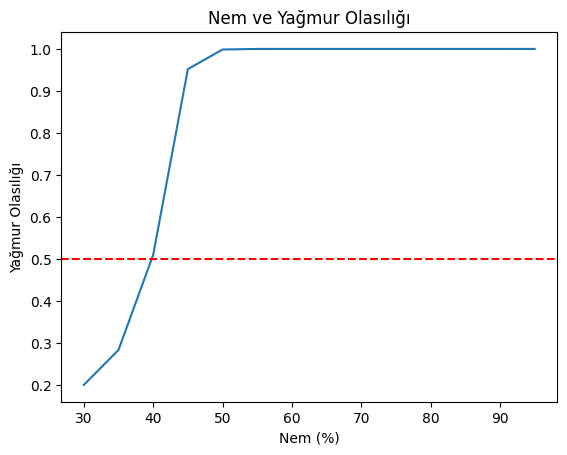

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Örnek hava durumu verisi (daha geniş bir veri seti ile çalışmak gerekir)
data = {
    "Sıcaklık": [20, 22, 19, 23, 21, 24, 22, 18, 25, 28, 27, 29, 30, 26, 24],
    "Nem": [30, 45, 35, 40, 38, 50, 42, 60, 70, 75, 80, 85, 90, 65, 55],
    "Rüzgar Hızı": [5, 7, 4, 6, 5, 8, 7, 6, 5, 4, 6, 7, 8, 5, 6],
    "Hava Durumu": [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # 0: Güneşli, 1: Yağmurlu
}

df = pd.DataFrame(data)

# Veriyi hazırlama
x = df[["Sıcaklık", "Nem", "Rüzgar Hızı"]].values
y = df["Hava Durumu"].values

# Modeli oluşturma
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(x, y, epochs=50, batch_size=2)

# Yeni veri ile tahmin yapma
new_data = np.array([[25, 50, 6], [18, 35, 4], [30, 40, 7], [22, 72, 5], [24, 85, 6]])  # Sıcaklık, Nem, Rüzgar Hızı
predictions = model.predict(new_data)
predictions = (predictions > 0.5).astype(int)
print(f"Tahminler: {predictions.flatten()}")

# Nem eşiğini belirleme
humidity_levels = np.arange(30, 100, 5)
rain_predictions = []

for humidity in humidity_levels:
    test_data = np.array([[22, humidity, 5]])
    prediction = model.predict(test_data)
    rain_predictions.append((humidity, prediction[0][0]))

# Sonuçları görselleştirme
plt.plot([h[0] for h in rain_predictions], [h[1] for h in rain_predictions])
plt.axhline(0.5, color='r', linestyle='--')
plt.xlabel('Nem (%)')
plt.ylabel('Yağmur Olasılığı')
plt.title('Nem ve Yağmur Olasılığı')
plt.show()



Sonuçların Yorumu ve Kullanımı
Bu örnek, derin öğrenme ile hava durumu tahmininin nasıl yapılabileceğini ve günlük yaşamımızda nasıl kullanılabileceğini göstermektedir. Model, sıcaklık, nem ve rüzgar hızı gibi parametreleri kullanarak hava durumu tahmini yapar ve bu tahmine göre günlük işler için önerilerde bulunur.

Bu tür bir uygulama, tarımdan günlük planlamaya kadar birçok alanda kullanılabilir. Eğlenceli ve akılda kalıcı bir arayüz ile kullanıcıların tahmin sonuçlarını görmesi ve buna göre plan yapması sağlanabilir.

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Örnek hava durumu verisi
data = {
    "Sıcaklık": [10, 22, 19, 23, 21, 24, 5, 18, 25, 28, 27, 29, 30, 26, 14],
    "Nem": [80, 45, 55, 70, 85, 50, 42, 60, 75, 40, 35, 85, 90, 65, 55],
    "Rüzgar Hızı": [15, 7, 4, 6, 5, 8, 7, 6, 5, 4, 6, 7, 8, 5, 6],
    "Hava Durumu": [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]  # 0: Güneşli/Soğuk, 1: Yağmurlu/Rüzgarlı
}

df = pd.DataFrame(data)

# Veriyi hazırlama
x = df[["Sıcaklık", "Nem", "Rüzgar Hızı"]].values
y = df["Hava Durumu"].values

# Modeli oluşturma
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(x, y, epochs=50, batch_size=2)



Epoch 1/50
8/8 [==============================] - 2s 6ms/step - loss: 0.9201 - accuracy: 0.5333 
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.6000
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.7333
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5948 - accuracy: 0.6000
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6006 - accuracy: 0.5333
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5726 - accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5998 - accuracy: 0.7333
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5712 - accuracy: 0.8000
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5821 - accuracy: 0.6667
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.6000
Epoch 11/50
8/8 [=====================

# Interaktif Arayüz Oluşturma

Aşağıda, interaktif bir arayüz ile kullanıcıların sıcaklık, nem ve rüzgar hızı değerlerini girerek tahmin sonuçlarını görmelerini sağlayan kod bulunmaktadır:

In [25]:
# Interaktif arayüz
def on_button_click(b):
    temp = float(temp_input.value)
    humidity = float(humidity_input.value)
    wind_speed = float(wind_speed_input.value)

    # Hava durumu kriterlerine göre tahmin yapma
    if humidity > 70 and 10 <= temp <= 25:
        prediction = 1  # Yağmurlu
    elif wind_speed > 10:
        prediction = 1  # Rüzgarlı
    elif temp < 10:
        prediction = 0  # Soğuk
    elif humidity < 50 and 20 <= temp <= 30:
        prediction = 0  # Güneşli
    else:
        prediction = model.predict(np.array([[temp, humidity, wind_speed]]))
        prediction = (prediction > 0.5).astype(int).flatten()[0]

    # Tahmine göre sonuç
    if prediction == 0:
        result.value = "Güneşli ☀️ - Güzel bir gün! Piknik yapabilirsiniz."
    elif prediction == 1:
        result.value = "Yağmurlu 🌧️ - Şemsiye almayı unutmayın. İç mekan aktiviteleri yapabilirsiniz."
    else:
        result.value = "Soğuk ❄️ - Kalın giyinin ve sıcak bir şeyler için."
    if wind_speed > 10:
        result.value += " Ayrıca, rüzgarlı! Uçuşan şeylere dikkat edin."

# Kullanıcı girişleri
temp_input = widgets.FloatText(value=20, description='Sıcaklık:')
humidity_input = widgets.FloatText(value=30, description='Nem:')
wind_speed_input = widgets.FloatText(value=5, description='Rüzgar Hızı:')
button = widgets.Button(description="Tahmin Et")
result = widgets.Label()

button.on_click(on_button_click)

display(temp_input, humidity_input, wind_speed_input, button, result)


FloatText(value=20.0, description='Sıcaklık:')

FloatText(value=30.0, description='Nem:')

FloatText(value=5.0, description='Rüzgar Hızı:')

Button(description='Tahmin Et', style=ButtonStyle())

Label(value='')

1/1 [==============================] - 0s 82ms/step


Bu arayüz, kullanıcıların sıcaklık, nem ve rüzgar hızı değerlerini girerek hava durumu tahmini yapmalarını sağlar. Tahminler belirlenen kriterlere ve eğitilmiş modele göre yapılır.